+ **تبدیل فوریه**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
from skimage import io
from skimage import img_as_float

In [2]:
image_folder = "images"
im_airplane = os.path.join(image_folder,"airplane.tiff")

In [3]:
im1 = io.imread(im_airplane,as_gray=True)
im1 = img_as_float(im1)

In [4]:
from numpy.fft import fft2, ifft2, fftshift

In [5]:
im_frq = fft2(im1)

In [238]:
im_frq_mag = np.abs(im_frq) #image magnitude
im_frq_ph = np.angle(im_frq) #image phase

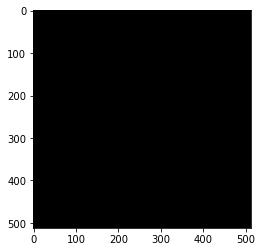

In [239]:
plt.imshow(im_frq_mag)

In [240]:
def show_image_frequency(image_frequency):
    im_frq_shift = fftshift(image_frequency)
    plt.imshow(20*np.log10(0.01+np.abs(im_frq_shift)),cmap="gray")

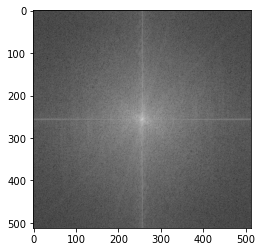

In [241]:
show_image_frequency(im_frq)

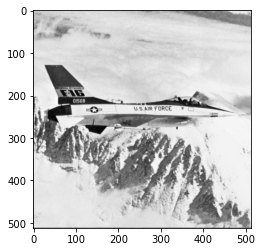

In [242]:
im_reconstruct = np.abs(ifft2(im_frq))
plt.imshow(im_reconstruct)

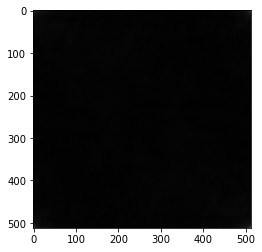

In [243]:
im_reconstruct = np.abs(ifft2(im_frq_mag))
plt.imshow(im_reconstruct)

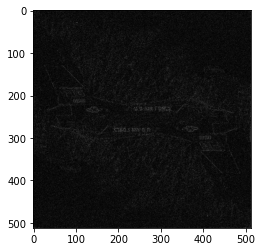

In [244]:
im_reconstruct = np.abs(ifft2(im_frq_ph))
plt.imshow(im_reconstruct)

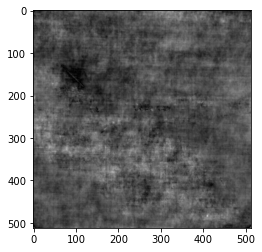

In [245]:
im_frq_shift = fftshift(im_frq_mag)
im_frq_reconstruct = im_frq_shift*np.exp(1j*im_frq_ph)
im_reconstruct = np.abs(ifft2(im_frq_reconstruct))
plt.imshow(im_reconstruct)

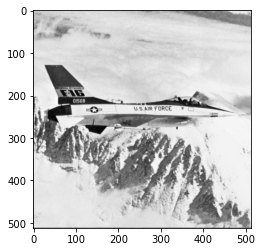

In [246]:
im_frq_shift = fftshift(im_frq_mag)
im_frq_reconstruct = fftshift(im_frq_shift)*np.exp(1j*im_frq_ph)
im_reconstruct = np.abs(ifft2(im_frq_reconstruct))
plt.imshow(im_reconstruct)

**کانولوشن تصویر**

**فیلتر متوسط جعبه‌ای (فیلتر بلوری یا فیلتر پایین‌گذر)**

In [259]:
blur_box_kernel = np.ones((3,3)) / 9

In [260]:
from scipy.signal import convolve2d

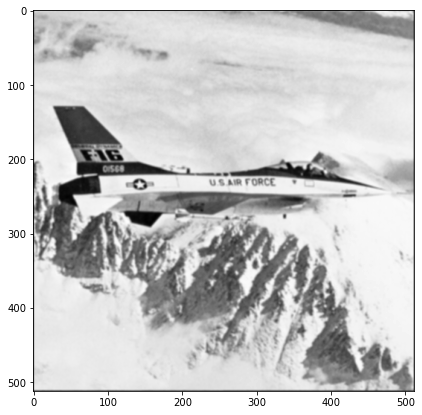

In [265]:
plt.figure(figsize=(7,7))
im_filter = convolve2d(im1,blur_box_kernel,mode="same")
plt.imshow(im_filter)

**فیلتر متوسط گوسی**

In [262]:
blur_gaussian_kernel = np.array([[1,2,1],[2,4,2],[1,2,1]]) / 16

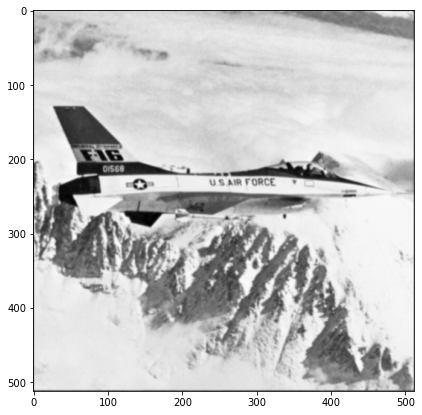

In [264]:
plt.figure(figsize=(7,7))
im_filter = convolve2d(im1,blur_gaussian_kernel,mode="same")
plt.imshow(im_filter)

**انواع روش‌های padding**

In [250]:
im_filter = convolve2d(im1,blur_box_kernel,mode="same")
im_filter.shape

(512, 512)

In [251]:
im_filter = convolve2d(im1,blur_box_kernel,mode="full")
im_filter.shape

(518, 518)

In [252]:
im_filter = convolve2d(im1,blur_box_kernel,mode="valid")
im_filter.shape

(506, 506)

**فیلتر افقی**

In [253]:
horizontal_kernel = np.array([[-1,-1,-1],[2,2,2],[-1,-1,-1]])

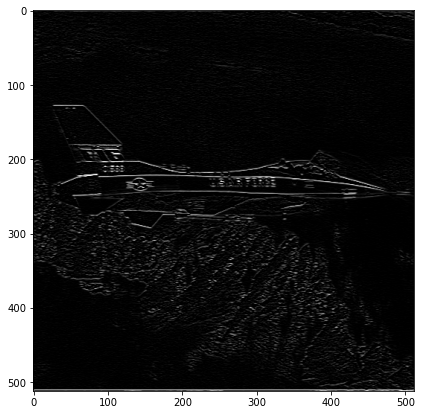

In [266]:
plt.figure(figsize=(7,7))
im_filter = convolve2d(im1,horizontal_kernel,mode="same")
im_filter = np.clip(im_filter,0,1)
plt.imshow(im_filter)

**فیلتر عمودی**

In [255]:
vertical_kernel = np.array([[-1,2,-1],[-1,2,-1],[-1,2,-1]])

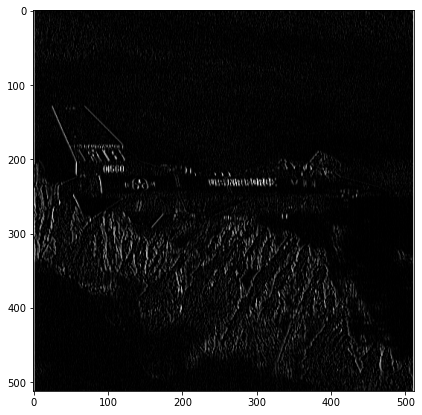

In [267]:
plt.figure(figsize=(7,7))
im_filter = convolve2d(im1,vertical_kernel,mode="same")
im_filter = np.clip(im_filter,0,1)
plt.imshow(im_filter)

**فیلتر ridge**

In [257]:
ridge_kernel = np.array([[0,-1,0],[-1,4,-1],[0,-1,0]])

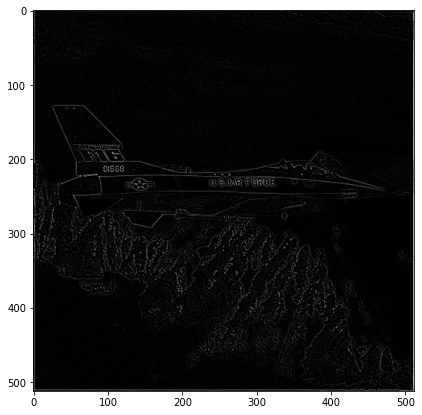

In [268]:
plt.figure(figsize=(7,7))
im_filter = convolve2d(im1,ridge_kernel,mode="same")
im_filter = np.clip(im_filter,0,1)
plt.imshow(im_filter)

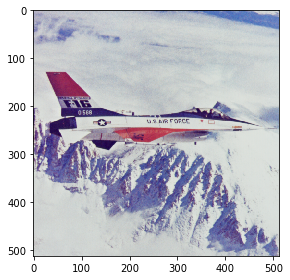

In [269]:
im_color = io.imread(im_airplane)
io.imshow(im_color)

In [270]:
im_color_filter = np.zeros(im_color.shape)

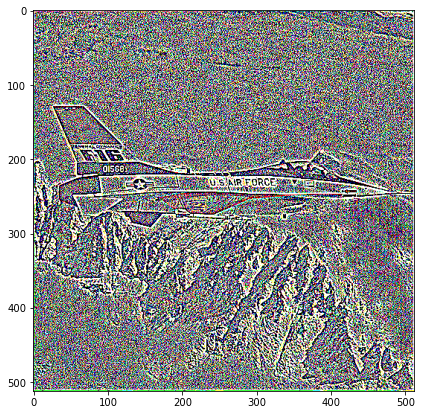

In [279]:
plt.figure(figsize=(7,7))
im_color_filter[...,0] = convolve2d(im_color[...,0],ridge_kernel,mode="same")
im_color_filter[...,1] = convolve2d(im_color[...,1],ridge_kernel,mode="same")
im_color_filter[...,2] = convolve2d(im_color[...,2],ridge_kernel,mode="same")
im_color_filter  = np.clip(im_color_filter ,0,1)
plt.imshow(im_color_filter )

**کانولوشن در حوزه فرکانس**

In [280]:
from scipy.signal import gaussian

In [282]:
def make_gaussian_kernel(size,std):
    return np.outer(gaussian(size,std),gaussian(size,std))

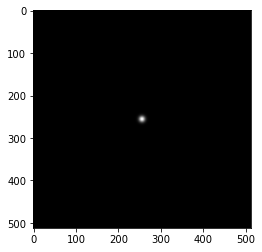

In [319]:
gaussian_kernel = make_gaussian_kernel(size=512,std=5)
plt.imshow(gaussian_kernel)

In [320]:
gaussian_kernel_frq = fft2(gaussian_kernel)

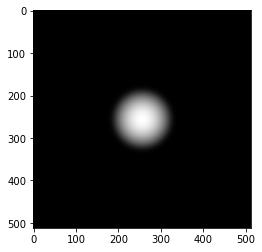

In [321]:
show_image_frequency(gaussian_kernel_frq)

In [322]:
im_filter_frq = im_frq*gaussian_kernel_frq

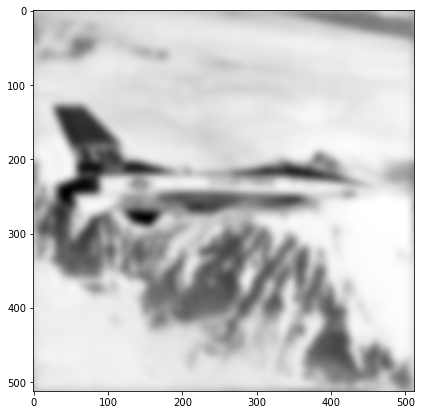

In [323]:
plt.figure(figsize=(7,7))
im_reconstruct = np.abs(fftshift(ifft2(im_filter_frq)))
plt.imshow(im_reconstruct)

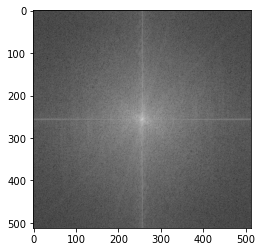

In [324]:
show_image_frequency(im_frq)

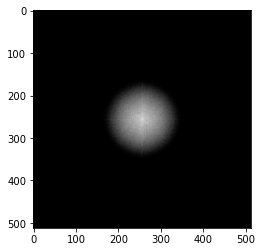

In [325]:
show_image_frequency(im_filter_frq)

**فیلتر بالاگذر**

In [365]:
W,H = im_frq.shape

In [366]:
im_frq_copy = np.copy(im_frq)

In [367]:
im_shift = fftshift(im_frq_copy)

In [368]:
hlaf_w = int(W/2)
half_h = int(H/2)

In [369]:
im_shift[hlaf_w-20:hlaf_w+21,half_h-20:half_h+21] = 0

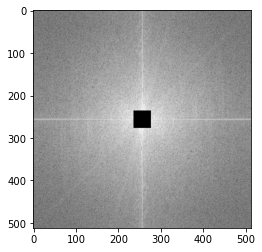

In [370]:
plt.imshow(20*np.log10(0.01+np.abs(im_shift)),cmap="gray")

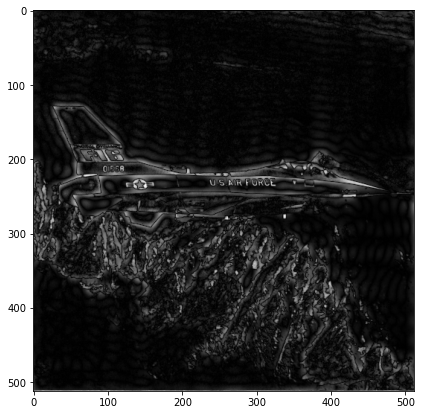

In [371]:
plt.figure(figsize=(7,7))
im_filter = np.abs(ifft2(fftshift(im_shift)))
plt.imshow(im_filter)

**بازیابی تصاویر با روش فیلتر معکوس**

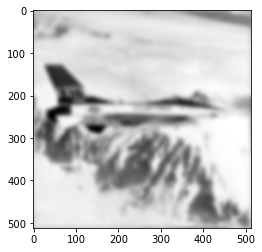

In [384]:
plt.imshow(im_reconstruct)

In [395]:
epsilon = 1e-6
inverse_kernel = 1/(epsilon + gaussian_kernel_frq)

In [396]:
im_reconstruct_frq = fft2(im_reconstruct)

In [397]:
im_restor_frq = im_reconstruct_frq * inverse_kernel

In [400]:
im_restor = np.abs(fftshift(ifft2(im_restor_frq)))

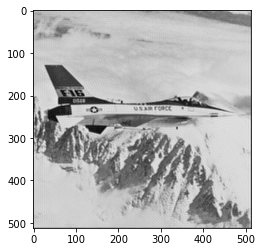

In [401]:
plt.imshow(im_restor)

اختلاف تصویر بازیابی شده با تصویر اصلی

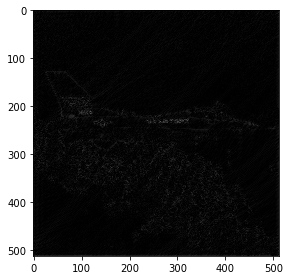

In [402]:
from skimage.util import compare_images
diff = compare_images(im_restor,im1,method='diff')
io.imshow(diff)